#  Level 3 (Advanced)

## Task 1: Predictive Modeling (Classification)

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("Stock Prices Data Set.csv")

In [3]:
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [4]:
df=df.dropna()

In [5]:
df.loc[:, "Pick_Up"] = (df["close"] > df["open"]).astype(int)

In [6]:
le=LabelEncoder()

In [7]:
df.loc[:, "symbol"]=le.fit_transform(df["symbol"])

In [8]:
X=df[["symbol","open","high","low","volume"]]
y=df["Pick_Up"]

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [12]:
results = {}

In [13]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }

In [14]:
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.831938   0.808055  0.882849  0.843798
Decision Tree        0.754184   0.761043  0.760791  0.760917
Random Forest        0.793885   0.797615  0.802838  0.800218


In [15]:
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

In [16]:
rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(
    rf,
    param_grid,
    cv=3,
    scoring="f1",
    n_jobs=-1
)

In [ ]:
grid.fit(X_train_scaled, y_train)

best_model = grid.best_estimator_

## Task 3: Natural Language Processing (NLP) - Sentiment Analysis

In [7]:
!pip install nltk textblob wordcloud

In [8]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud

In [16]:
df = pd.read_csv("Stock Prices Data Set.csv")
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [17]:
df['comment'] = df['symbol'].apply(
    lambda x: f"The stock performance of {x} looks very good and promising"
)

In [18]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

df['clean_text'] = df['comment'].apply(preprocess_text)

In [19]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['clean_text'].apply(get_sentiment)
df[['comment', 'sentiment']].head()

,comment,sentiment
0,The stock performance of AAL looks very good a...,Positive
1,The stock performance of AAPL looks very good ...,Positive
2,The stock performance of AAP looks very good a...,Positive
3,The stock performance of ABBV looks very good ...,Positive
4,The stock performance of ABC looks very good a...,Positive


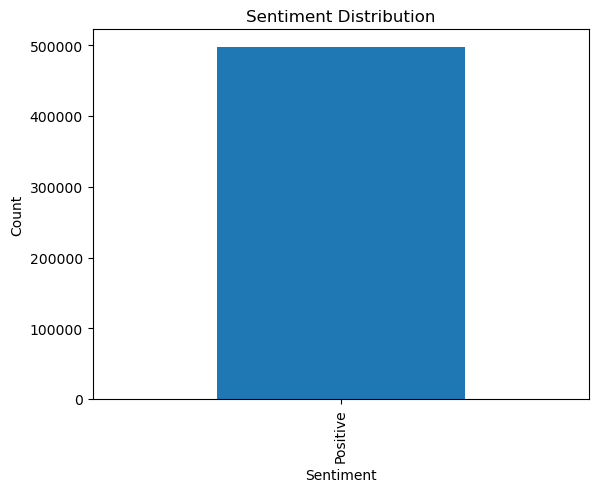

In [20]:
df['sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

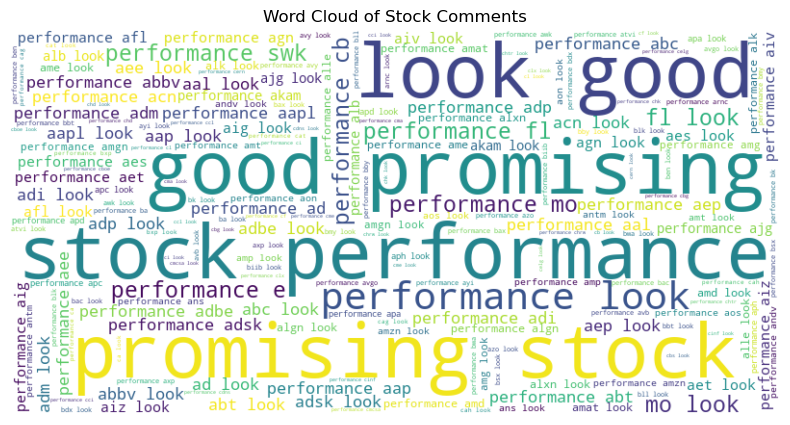

In [21]:
all_words = " ".join(df['clean_text'])
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(all_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Stock Comments")
plt.show()